In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

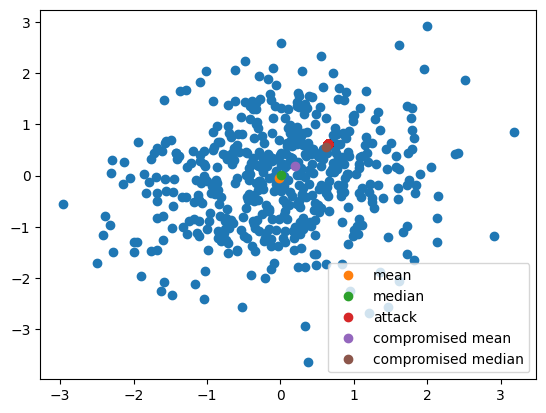

In [75]:
rng = np.random.default_rng(42)
npoints = 1000
nattackpoints = npoints // 4
s = npoints // 2 + 1 - nattackpoints
zmax = sp.stats.norm.ppf((npoints - s) / npoints)

X = rng.normal(size=(npoints // 2, 2))
attack_X = np.tile(X.mean(axis=0) + zmax * X.std(axis=0), (nattackpoints, 1))
compromised_X = np.concatenate((X, attack_X))

plt.plot(X[:,0], X[:,1], 'o')
X_mean = X.mean(axis=0)
plt.plot(X_mean[0], X_mean[1], 'o', label="mean")
X_median = np.median(X, axis=0)
plt.plot(X_median[0], X_median[1], 'o', label="median")
plt.plot(attack_X[:,0], attack_X[:,1], 'o', label="attack")

cX_mean = compromised_X.mean(axis=0)
plt.plot(cX_mean[0], cX_mean[1], 'o', label="compromised mean")
cX_median = np.median(compromised_X, axis=0)
plt.plot(cX_median[0], cX_median[1], 'o', label="compromised median")

plt.legend()
plt.show()

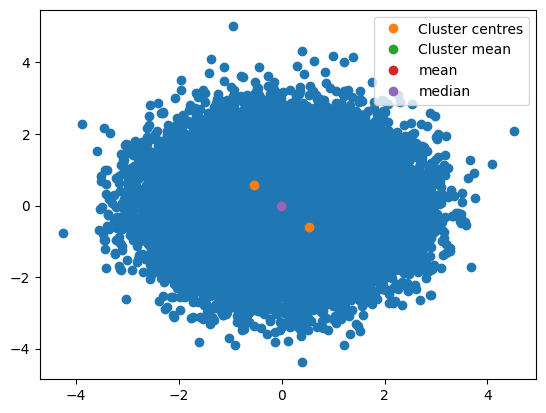

In [60]:
model = KMeans(2, n_init='auto').fit(X)
plt.plot(X[:,0], X[:,1], 'o')
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'o', label="Cluster centres")
cluster_mean = np.mean(model.cluster_centers_, axis=0)
plt.plot(cluster_mean[0], cluster_mean[1], 'o', label="Cluster mean")
X_mean = X.mean(axis=0)
plt.plot(X_mean[0], X_mean[1], 'o', label="mean")
X_median = np.median(X, axis=0)
plt.plot(X_median[0], X_median[1], 'o', label="median")
plt.legend()
plt.show()

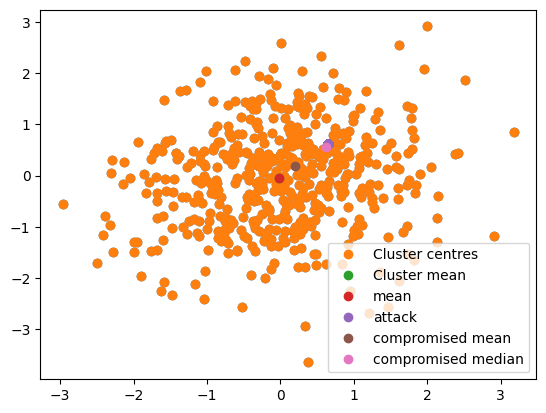

cluster_mean=array([-0.01457188, -0.03872139])
X_mean=array([-0.01870525, -0.03907785])


In [78]:
model = KMeans(npoints // 2, n_init='auto').fit(compromised_X)
plt.plot(X[:,0], X[:,1], 'o')
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'o', label="Cluster centres")
cluster_mean = np.mean(model.cluster_centers_, axis=0)
plt.plot(cluster_mean[0], cluster_mean[1], 'o', label="Cluster mean")

X_mean = X.mean(axis=0)
plt.plot(X_mean[0], X_mean[1], 'o', label="mean")
X_median = np.median(X, axis=0)
# plt.plot(X_median[0], X_median[1], 'o', label="median")
plt.plot(attack_X[:,0], attack_X[:,1], 'o', label="attack")

cX_mean = compromised_X.mean(axis=0)
plt.plot(cX_mean[0], cX_mean[1], 'o', label="compromised mean")
cX_median = np.median(compromised_X, axis=0)
plt.plot(cX_median[0], cX_median[1], 'o', label="compromised median")

plt.legend()
plt.show()
print(f"{cluster_mean=}")
print(f"{X_mean=}")

cs.mean(axis=0)=array([1.0258881 , 1.15415756]) vs. X.mean(axis=0)=array([-0.07139679, -0.03887311])


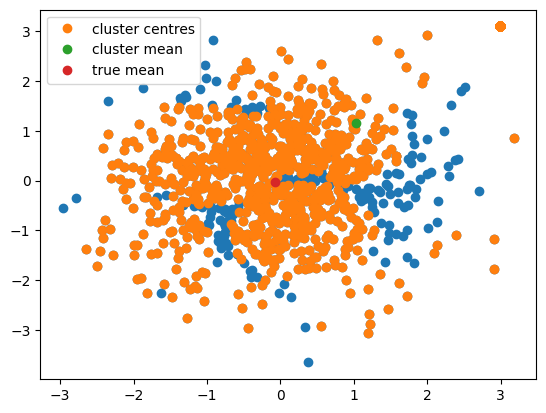

In [44]:
def cluster(X, eps=1):
    dists = pairwise_distances(X)
    centres = set()
    considered = set()
    for i in range(len(dists)):
        if i in considered:
            continue
        connections = set(np.where(dists[i] <= eps)[0])
        # print(f"{i=}: {connections=}")
        for c in connections:
            if i != c and c not in considered:
                other_connections = set(np.where(dists[c] <= eps)[0])
                # print(f"{c=}: {other_connections=}")
                for o in other_connections:
                    if o != i and o != c and o not in considered:
                        distal_connections = set(np.where(dists[o] <= eps)[0])
                        # print(f"{o=}: {distal_connections=}")
                        centre = connections & other_connections & distal_connections
                        # print(f"{centre=}")
                        if len(centre):
                            considered = considered | {i, c, o}
                            centres = centres | centre
        # print(f"{i=}: {[c in centres for c in connections]}")
        if not np.any([c in centres for c in connections]):
            for c in connections:
                if i != c:
                    other_connections = set(np.where(dists[c] <= eps)[0])
                    for o in other_connections:
                        if o in centres:
                            # print(f"new centre {i}")
                            centres = centres | {i}
    return X[list(centres)]
    

# X = rng.normal(size=(10, 2))
cs = cluster(compromised_X)
# print(f"{cs=}")
print(f"{cs.mean(axis=0)=} vs. {X.mean(axis=0)=}")

plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(cs[:, 0], cs[:, 1], 'o', label="cluster centres")
plt.plot(cs.mean(axis=0)[0], cs.mean(axis=0)[1], 'o', label="cluster mean")
plt.plot(X.mean(axis=0)[0], X.mean(axis=0)[1], 'o', label="true mean")
plt.legend()
plt.show()